In [ ]:
# Import required libraries
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#DS upload
from google.colab import files
import os

uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Locate CSV file
extracted_files = os.listdir("/content/")
csv_file = [f for f in extracted_files if f.endswith(".csv")][0]
csv_path = os.path.join("/content/", csv_file)

df = pd.read_csv(csv_path)

print("Dataset Loaded Successfully!\n")
print(df.head(), "\n")
print("Dataset Info:\n")
print(df.info(), "\n")

Saving archive (3).zip to archive (3).zip
Dataset Loaded Successfully!

                             Patient_ID  Age     Sex Family_History  \
0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   

   HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
0                     67       Moderate            Severe          8.80   
1                     38         Severe          Moderate          3.24   
2                     37         Severe          Moderate          1.01   
3                     50           Mild            Severe          3.21   
4                     48       Moderate              Mild          2.31   

   Brain_Volume_Loss  Functional_Capacity  ... HTT

In [ ]:
#Fill Missing Values
df = df.fillna(method='ffill')
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

Patient_ID                   0
Age                          0
Sex                          0
Family_History               0
HTT_CAG_Repeat_Length        0
Motor_Symptoms               0
Cognitive_Decline            0
Chorea_Score                 0
Brain_Volume_Loss            0
Functional_Capacity          0
Gene_Mutation_Type           0
HTT_Gene_Expression_Level    0
Protein_Aggregation_Level    0
Random_Protein_Sequence      0
Random_Gene_Sequence         0
Disease_Stage                0
Gene/Factor                  0
Chromosome_Location          0
Function                     0
Effect                       0
Category                     0
dtype: int64


/tmp/ipython-input-421101444.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
# Remove High Leakage Columns
df = df.drop(columns=[
    "Patient_ID",
    "Function",
    "Effect",
    "Gene/Factor",
    "Chromosome_Location",
    "Random_Protein_Sequence",
    "Random_Gene_Sequence"
])

In [ ]:
#  Encode Categorical Columns
label_encoders = {}
for col in df.select_dtypes(include="object"):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#  Display the updated category distributions
print("\nMotor_Symptoms Categories Count:")
print(df["Motor_Symptoms"].value_counts())

print("\nDisease_Stage Categories Count:")
print(df["Disease_Stage"].value_counts())

print("\nCategory (Final Diagnosis) Count:")
print(df["Category"].value_counts())


Motor_Symptoms Categories Count:
Motor_Symptoms
1    16261
2    16157
0    16118
Name: count, dtype: int64

Disease_Stage Categories Count:
Disease_Stage
2    12289
3    12191
0    12032
1    12024
Name: count, dtype: int64

Category (Final Diagnosis) Count:
Category
2    24279
1    12229
0    12028
Name: count, dtype: int64


In [ ]:
#  Prepare Data
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=["Motor_Symptoms","Disease_Stage","Category"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = []


Training Logistic Regression for: Motor_Symptoms
Accuracy: 0.33952118015493654
Precision: 0.33862856294599664
Recall: 0.33952118015493654
F1 Score: 0.32762547964428756


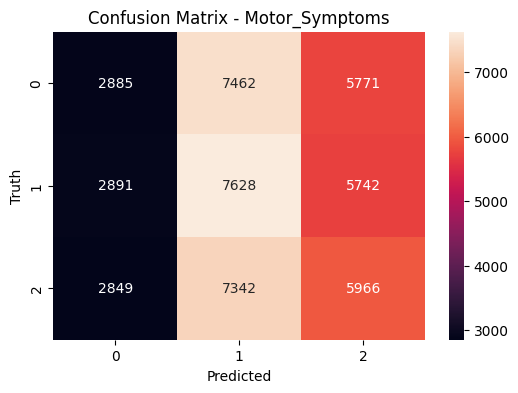


Training Logistic Regression for: Disease_Stage
Accuracy: 0.25871518048458875
Precision: 0.25891586152574153
Recall: 0.25871518048458875
F1 Score: 0.24803936021131973


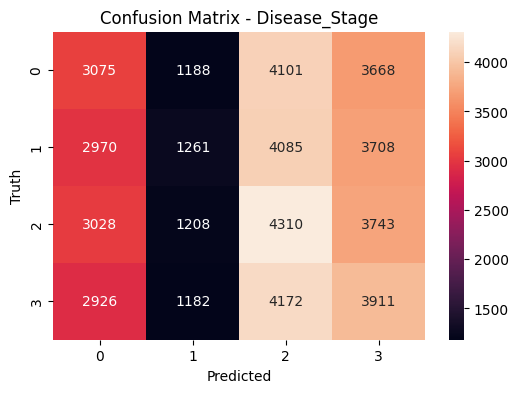


Training Logistic Regression for: Category
Accuracy: 0.5002266358991264
Precision: 0.2502266872629572
Recall: 0.5002266358991264
F1 Score: 0.33358518143225685


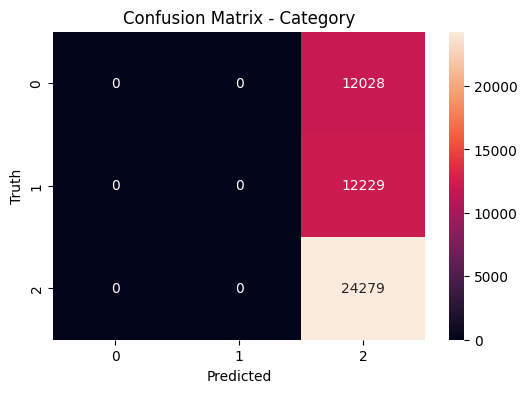

In [ ]:
 # Model Function
from sklearn.metrics import precision_score, recall_score, f1_score

def run_model(target):
    print("\n========================================")
    print(f"Training Logistic Regression for: {target}")
    print("========================================")

    y = df[target]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

    results.append([target, acc, prec, rec, f1])

# Train all 3 tasks
run_model("Motor_Symptoms")
run_model("Disease_Stage")
run_model("Category")

In [ ]:
#  Final Results Comparison
results_df = pd.DataFrame(results, columns=["Target", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n===== Comparison of Final Model Results =====")
print(results_df)


===== Comparison of Final Model Results =====
           Target  Accuracy  Precision    Recall  F1 Score
0  Motor_Symptoms  0.339521   0.338629  0.339521  0.327625
1   Disease_Stage  0.258715   0.258916  0.258715  0.248039
2        Category  0.500227   0.250227  0.500227  0.333585


In [ ]:
# Show Overall Accuracy for Final Diagnosis
overall_acc = results_df[results_df["Target"] == "Category"]["Accuracy"].values[0]
print("\nOverall Dataset Accuracy (Based on Category):", overall_acc)



Overall Dataset Accuracy (Based on Category): 0.5002266358991264


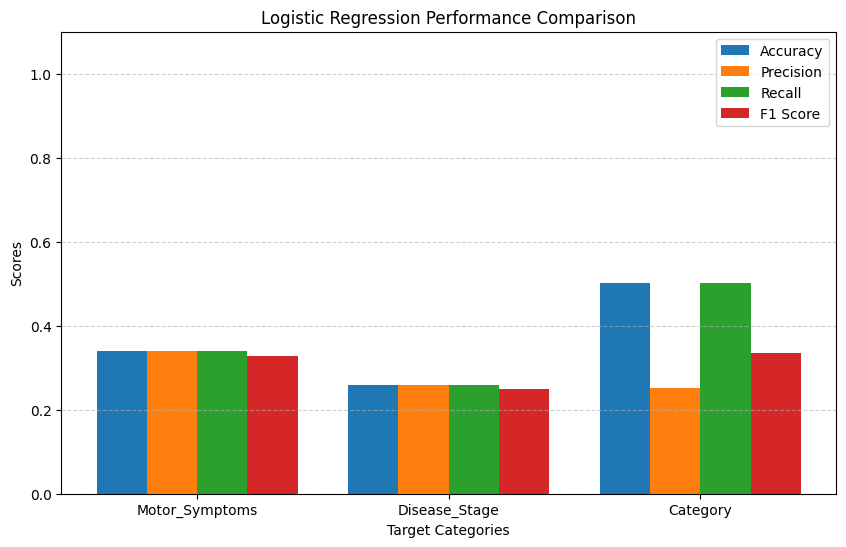

In [ ]:
# Combined Performance Graph for All 3 Targets

import numpy as np

plt.figure(figsize=(10,6))

bar_width = 0.2
positions = np.arange(len(results_df))

# Plot each metric as separate bars
plt.bar(positions - bar_width*1.5, results_df["Accuracy"], width=bar_width, label="Accuracy")
plt.bar(positions - bar_width*0.5, results_df["Precision"], width=bar_width, label="Precision")
plt.bar(positions + bar_width*0.5, results_df["Recall"], width=bar_width, label="Recall")
plt.bar(positions + bar_width*1.5, results_df["F1 Score"], width=bar_width, label="F1 Score")

plt.xticks(positions, results_df["Target"])
plt.title("Logistic Regression Performance Comparison")
plt.xlabel("Target Categories")
plt.ylabel("Scores")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [23]:
#Accuracy Summary

print("\nAccuracy Summary")

for index, row in results_df.iterrows():
    target = row["Target"]
    accuracy = row["Accuracy"] * 100  # Convert to %
    print(f"{target}: {accuracy:.2f}%")

# Overall dataset accuracy is based on Category predictions
overall_accuracy = results_df[results_df["Target"] == "Category"]["Accuracy"].values[0] * 100
print("\nOverall Dataset Accuracy (Based on Category): {:.2f}%".format(overall_accuracy))




Accuracy Summary
Motor_Symptoms: 33.95%
Disease_Stage: 25.87%
Category: 50.02%

Overall Dataset Accuracy (Based on Category): 50.02%
